In [3]:
import pandas as pd
import numpy as np
from IPython.display import display, display_pretty, Javascript, HTML
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from matplotlib.backends.backend_pdf import PdfPages


# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# adding an empty line to test

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [25]:
# Load 2014 and 2015 survey household data
person14 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Export\Release 3\General Release\Unzipped\2014-pr3-hhsurvey-persons.csv')
person15 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2015\Data\Person\3_PSRC2015_Person_2015-07-27_v1.2.csv')

In [28]:
# Load 2014 and 2015 survey household data
trips14 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Export\Release 3\General Release\Unzipped\2014-pr3-hhsurvey-trips.csv')
trips15 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2015\Data\Trips\4_PSRC2015_Trip_2015-07-27_v1.6.csv')

In [32]:
# Join 2014 and 2015 datasets; creates dataframe with 14 and 15 suffixes as column names
panel_trips = pd.merge(trips14, trips15, on='personID', suffixes=['_14','_15'])

In [108]:
def add_labels(fields, labels):
    '''adds frequency labels for a set of like fields'''

    for field in fields:
        panel_trips[field + '_label'] = panel_trips[field]
        panel_trips[field].fillna(0,inplace=True)
        panel_trips[field + '_label'] = ([labels[x] for x in panel_trips[field]])

In [109]:
labels = {  1: "SOV",
            2: "HOV",
            3: "HOV",
            4: "SOV",
            5: "HOV",
            6: "Bicycle",
            7: "Walk",
            8: "Bus",
            9: "Train+Streetcar",
           10: "Ferry",
           11: "Train+Streetcar",
           12: "Other",
           13: "Taxi",
           14: "Other",
           15: "Private bus/shuttle",
           16: "Other",
           17: "Other",
           -99: "NA"
}

freq_fields = ['mode']
fields14 = [fname + '_14' for fname in freq_fields]
fields15 = [fname + '_15' for fname in freq_fields]

add_labels(fields14+fields15, labels)

In [176]:
labels = {
    0.0: 'NA',
    1: 'Regular taxi',
    2: 'Rideshare',
    -99: 'NA'
}

freq_fields = ['taxi_type']
fields14 = [fname + '_14' for fname in freq_fields]
fields15 = [fname + '_15' for fname in freq_fields]

add_labels(fields14+fields15, labels)

# Mode

In [257]:
# Get the distribtion of each mode totals
mode14dist = panel_trips.groupby('mode_14_label').count()['personID']/panel_trips.groupby('mode_14_label').count()['personID'].sum()
mode15dist = panel_trips.groupby('mode_15_label').count()['personID']/panel_trips.groupby('mode_15_label').count()['personID'].sum()

df = pd.DataFrame([mode14dist, mode15dist]).T
df.columns=['2014','2015']

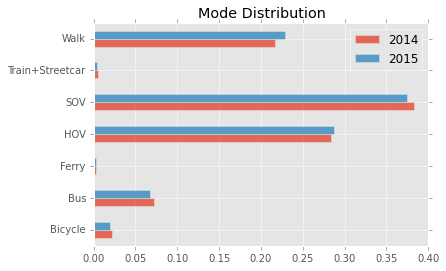

In [258]:
# Plot the distributions

# Drop some columns 
df.drop(['Taxi','Private bus/shuttle','Other','NA'],inplace=True)
plt.figure()
df.plot(kind='barh', alpha=0.8, title='Mode Distribution')

In [251]:
type(mode14dist)
mode14dist

mode_14_label
Bicycle                0.022562
Bus                    0.072245
Ferry                  0.003257
HOV                    0.283787
NA                     0.000086
Other                  0.008315
Private bus/shuttle    0.004012
SOV                    0.382983
Taxi                   0.001303
Train+Streetcar        0.005126
Walk                   0.216325
Name: personID, dtype: float64

In [252]:
type(taxi14)
taxi14

taxi_type_14_label
NA                    58248
Regular taxi             56
Rideshare                25
Name: personID, dtype: int64

# Taxi

In [270]:
# How many taxi trips in a rideshare vehicle?
taxi14 = panel_trips.groupby('taxi_type_14_label').count()['personID']
taxi15 = panel_trips.groupby('taxi_type_15_label').count()['personID']

df = pd.DataFrame([taxi14,taxi15]).T
df.columns = ['2014','2015']
df.drop(['NA'],inplace=True)    # drop the NA responses
df['change, 14->15'] = df['2015'] - df['2014']
df

,2014,2015,"change, 14->15"
taxi_type_14_label,,,
Regular taxi,56,39,-17
Rideshare,25,85,60


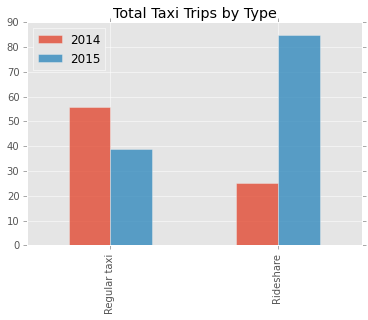

In [271]:
df = df[['2014','2015']]
df.index.name = ""    # clear index name to remove as x-axis label
plt.figure()
df.plot(kind='bar', alpha=0.8, title='Total Taxi Trips by Type')

In [187]:
# Total number of trips is still very small, but notable increase in rideshare usage over taxi.